In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
train = pd.read_csv('mimic_synthetic_train.csv')
test = pd.read_csv('die_test.csv')
train = train.drop([0],axis=0)

/home/loser/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (291,336) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
Gender_mapping={'M':0,'F':1}
train['GENDER']=train['GENDER'].map(Gender_mapping)
test['GENDER']=test['GENDER'].map(Gender_mapping)

In [92]:
ICU_mapping={'CCU':1, 'MICU':2, 'TSICU':3, 'CSRU':4, 'SICU':5}
train['ICU']=train['ICU'].map(ICU_mapping)
test['ICU']=test['ICU'].map(ICU_mapping)

In [93]:
count=0
for i in train['Output'] :
    if(i==1):
        count=count+1
print(count)        
        
    

2797


In [94]:
train=train.iloc[:,9:]
test=test.iloc[:,9:]

In [95]:
train['Otnutritdx']=train['Otnutritdx'].astype(float)
test['Otnutritdx']=test['Otnutritdx'].astype(float)

In [96]:
train['Othnervdx']=train['Othnervdx'].astype(float)
test['Othnervdx']=test['Othnervdx'].astype(float)

In [97]:
for i in train:
    mean_value=train[i].mean()
    train[i]=train[i].fillna(mean_value)
for i in test:
    mean_value=test[i].mean()
    test[i]=test[i].fillna(mean_value)    

In [98]:
train_1=train[train['Output']>0]
train_0_raw=train[train['Output']<1] 
train_0=train_0_raw.iloc[:30000,:]
train=pd.concat([train_0,train_1])

In [99]:
Y = train.iloc[:,-1:]

In [100]:
X = train.iloc[:,:-1]

In [114]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X, Y = sm.fit_sample(X, np.ravel(Y))
print(sum(Y==0))
print(sum(Y==1))

3000
3000


In [115]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
test = sc_X.transform(test)

In [116]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

In [117]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [30]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1)
grid.fit(X_Train, Y_Train)
print (grid.best_params_)

/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.15, 'n_estimators': 122}


In [118]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 148, num_leaves = 38)
estimator.fit(X_Train,Y_Train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.125, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=148, n_jobs=-1, num_leaves=38,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [119]:
print(estimator.score(X_Test,Y_Test))

0.76


In [120]:
Y_test = estimator.predict(test)

In [121]:
Y_test

array([1, 0, 0, ..., 0, 0, 0])

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


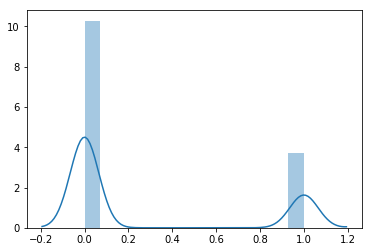

In [122]:
import seaborn as sns
sns.distplot(Y_test)

In [84]:
l=[]
for i in range(len(Y_test)) :
    if(Y_test[i]>0.5):
        Y_test[i]=1
    else:
        Y_test[i]=0
Y_test   

array([1, 1, 0, ..., 0, 0, 0])

In [85]:
Y_test = Y_test.astype('int')

In [86]:
Y_test

array([1, 1, 0, ..., 0, 0, 0])

In [87]:
count=0
for i in Y_test :
    
    
    
    if(i==0):
        count=count+1
print(count)   

15626


In [88]:
import csv

with open('mimic_synthetic_test.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    for i in Y_test:
        writer.writerow([i])

csvFile.close()

In [ ]:
#1700 72% 

In [ ]:
#1700 1700 73% 0.125 120

In [ ]:
#1000 1000 71%